# Part 2: Real Estate Market Data Exploration in major French cities

In [37]:
pip install datefinder

Note: you may need to restart the kernel to use updated packages.


In [384]:
import pyspark
import pandas as pd
import datefinder
import numpy as np

In [281]:
sc = pyspark.SparkContext(appName="Spark RDD")

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=Spark RDD, master=local[*]) created by __init__ at <ipython-input-3-7f82abc9a3a2>:1 

# Importing the Data 

In [10]:
df= pd.read_csv('data/real_estate_transactions.csv', sep=';')

In [15]:
len(df.keys())

11

In [282]:
rdd_estate = sc.textFile('data/real_estate_transactions.csv') \
               .map(lambda line: line.split(";")) \
               .filter(lambda line: len(line)>1) \
               .map(lambda line: (line[0:]))

In [ ]:
'''['City',
  'Sale Date',
  'Sale Type',
  'Price',
  'Postal Code',
  'Commune',
  'Number of lots',
  'Local Type',
  'Living Area',
  'Number of rooms',
  'Land Area']'''

# Cleaning the Data 

In [283]:
header = rdd_estate.first()
#rdd.filter(lambda line: line != header)

In [284]:
rdd_estate = rdd_estate.filter(lambda line: line != header)

rdd_estate.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  '102000,00',
  '6000',
  'NICE',
  '1',
  'APARTMENT',
  '29',
  '2',
  ''],
 ['NICE',
  '07/04/2015',
  'SALE',
  '32000,00',
  '6000',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '51',
  '2',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '30000,00',
  '6000',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '410000,00',
  '6200',
  'NICE',
  '2',
  'APARTMENT',
  '60',
  '3',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '67',
  '3',
  ''],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'H

In [285]:
def find_date(tweet) :
    matches = list(datefinder.find_dates(tweet))
    if len(matches) > 0:
        date_ = matches[0]
    else : 
        date_ = None
    return date_

In [286]:
rdd_estate_nb_year = rdd_estate.map(lambda tuple: find_date(tuple[1]).year) 


rdd_estate_nb_year.distinct().count()

5

No need to add city for 2019 transactions (already done)

In [287]:
rdd_estate.filter(lambda tuple: find_date(tuple[1]).year == 2019)

rdd_estate.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  '102000,00',
  '6000',
  'NICE',
  '1',
  'APARTMENT',
  '29',
  '2',
  ''],
 ['NICE',
  '07/04/2015',
  'SALE',
  '32000,00',
  '6000',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '51',
  '2',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '30000,00',
  '6000',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '410000,00',
  '6200',
  'NICE',
  '2',
  'APARTMENT',
  '60',
  '3',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '67',
  '3',
  ''],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'H

 keep only sale and sale before completion transactions

In [51]:
rdd_estate.map(lambda tuple: tuple[2]).distinct().count()

6

In [147]:
rdd_estate.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  '102000,00',
  '6000',
  'NICE',
  '1',
  'APARTMENT',
  '29',
  '2',
  ''],
 ['NICE',
  '07/04/2015',
  'SALE',
  '32000,00',
  '6000',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '51',
  '2',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '30000,00',
  '6000',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '410000,00',
  '6200',
  'NICE',
  '2',
  'APARTMENT',
  '60',
  '3',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'DEPENDENCY',
  '0',
  '0',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '67',
  '3',
  ''],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'H

In [293]:
rdd_estate_clean = rdd_estate.filter(lambda tuple: tuple[2] == 'SALE' or tuple[2] == 'SALE BEFORE COMPLETION')

rdd_estate_clean.map(lambda tuple: (tuple[2],1))\
                .reduceByKey(lambda x,y : x+y)\
                .sortBy(lambda tuple: tuple[1], ascending=False)\
                .take(2)

[('SALE', 754464), ('SALE BEFORE COMPLETION', 147708)]

In [294]:
rdd_estate_clean.count()

902172

In [260]:
rdd_estate_clean.map(lambda tuple: tuple[2]).distinct().count()

6

keep only apartment and house transactions

In [261]:
rdd_estate.map(lambda tuple: tuple[7]).distinct().count()

5

In [295]:
rdd_estate_clean = rdd_estate_clean.filter(lambda tuple: tuple[7] == 'APARTMENT' or tuple[7] == 'HOUSE')

rdd_estate_clean.map(lambda tuple: (tuple[7],1))\
                .reduceByKey(lambda x,y : x+y)\
                .sortBy(lambda tuple: tuple[1], ascending=False)\
                .take(2)

[('APARTMENT', 445686), ('HOUSE', 37619)]

In [296]:
rdd_estate_clean.count()

483305

remove transactions without prices, postal code, rooms, or living area

In [263]:
rdd_estate_clean.map(lambda tuple: (tuple[8],1))\
                .reduceByKey(lambda x,y : x+y)\
                .sortBy(lambda tuple: tuple[1], ascending=False)\
                .filter(lambda tuple: tuple[1])\
                .collect()

[('30', 10357),
 ('40', 10270),
 ('60', 9224),
 ('50', 9094),
 ('45', 8659),
 ('35', 8127),
 ('70', 7954),
 ('25', 7768),
 ('65', 7757),
 ('20', 7725),
 ('42', 7373),
 ('18', 7286),
 ('32', 7154),
 ('48', 6596),
 ('28', 6516),
 ('55', 6492),
 ('38', 6392),
 ('63', 6314),
 ('68', 6285),
 ('80', 6188),
 ('43', 6140),
 ('64', 6076),
 ('67', 6075),
 ('46', 5978),
 ('66', 5938),
 ('36', 5903),
 ('62', 5875),
 ('44', 5820),
 ('47', 5763),
 ('33', 5623),
 ('52', 5608),
 ('27', 5517),
 ('26', 5404),
 ('34', 5340),
 ('41', 5337),
 ('56', 5324),
 ('39', 5311),
 ('22', 5242),
 ('37', 5212),
 ('24', 5191),
 ('31', 5141),
 ('29', 5042),
 ('61', 5035),
 ('49', 4999),
 ('58', 4916),
 ('57', 4910),
 ('75', 4839),
 ('19', 4834),
 ('23', 4750),
 ('54', 4736),
 ('53', 4618),
 ('72', 4599),
 ('69', 4441),
 ('90', 4393),
 ('51', 4368),
 ('21', 4364),
 ('59', 4324),
 ('15', 3819),
 ('17', 3807),
 ('85', 3685),
 ('16', 3646),
 ('73', 3604),
 ('78', 3572),
 ('71', 3493),
 ('76', 3484),
 ('74', 3479),
 ('82', 

In [297]:
rdd_estate_clean = rdd_estate_clean.filter(lambda tuple: tuple[3] != '')\
                                   .filter(lambda tuple: tuple[4] != '')\
                                   .filter(lambda tuple: tuple[9] != '')\
                                   .filter(lambda tuple: tuple[8] != '')

rdd_estate_clean.take(10)            

[['NICE',
  '26/03/2015',
  'SALE',
  '102000,00',
  '6000',
  'NICE',
  '1',
  'APARTMENT',
  '29',
  '2',
  ''],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '51',
  '2',
  ''],
 ['NICE',
  '23/03/2015',
  'SALE',
  '410000,00',
  '6200',
  'NICE',
  '2',
  'APARTMENT',
  '60',
  '3',
  ''],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '67',
  '3',
  ''],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'HOUSE',
  '160',
  '5',
  '500'],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'HOUSE',
  '160',
  '5',
  '1267'],
 ['NICE',
  '02/04/2015',
  'SALE',
  '130000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '31',
  '1',
  ''],
 ['NICE',
  '24/03/2015',
  'SALE',
  '115000,00',
  '6000',
  'NICE',
  '2',
  'APARTMENT',
  '50',
  '2',
  ''],
 ['NICE',
  '03/04/2015',
  'SALE',
  '172500,00',
  '6100',
  'NICE',
  '2',
 

In [298]:
rdd_estate_clean.count()

478005

In [299]:
def replaceNullValueByZero(tup):
    if tup[10] != '': 
        return tup
    else: 
        tup[10] = 0
        return tup

In [266]:
rdd_estate_clean.take(1)

[['NICE',
  '26/03/2015',
  'SALE',
  '102000,00',
  '6000',
  'NICE',
  '1',
  'APARTMENT',
  '29',
  '2',
  '']]

In [300]:
rdd_estate_clean = rdd_estate_clean.map(lambda tup: replaceNullValueByZero(tup))

rdd_estate_clean.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  '102000,00',
  '6000',
  'NICE',
  '1',
  'APARTMENT',
  '29',
  '2',
  0],
 ['NICE',
  '10/04/2015',
  'SALE',
  '239000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '51',
  '2',
  0],
 ['NICE',
  '23/03/2015',
  'SALE',
  '410000,00',
  '6200',
  'NICE',
  '2',
  'APARTMENT',
  '60',
  '3',
  0],
 ['NICE',
  '08/04/2015',
  'SALE',
  '215000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '67',
  '3',
  0],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'HOUSE',
  '160',
  '5',
  '500'],
 ['NICE',
  '20/03/2015',
  'SALE',
  '625000,00',
  '6200',
  'NICE',
  '0',
  'HOUSE',
  '160',
  '5',
  '1267'],
 ['NICE',
  '02/04/2015',
  'SALE',
  '130000,00',
  '6200',
  'NICE',
  '1',
  'APARTMENT',
  '31',
  '1',
  0],
 ['NICE',
  '24/03/2015',
  'SALE',
  '115000,00',
  '6000',
  'NICE',
  '2',
  'APARTMENT',
  '50',
  '2',
  0],
 ['NICE',
  '03/04/2015',
  'SALE',
  '172500,00',
  '6100',
  'NICE',
  '2',
  'APAR

In [301]:
rdd_estate_clean.count()

478005

fix price : int transformation

In [105]:
rdd_estate_clean.map(lambda tuple: (tuple[3],1))\
                .reduceByKey(lambda x,y : x+y)\
                .sortBy(lambda tuple: tuple[1], ascending=False)\
                .filter(lambda tuple: tuple[1])\
                .collect()

[('150000,00', 3715),
 ('200000,00', 3577),
 ('120000,00', 3380),
 ('100000,00', 3198),
 ('130000,00', 3190),
 ('160000,00', 3110),
 ('110000,00', 3087),
 ('140000,00', 3018),
 ('180000,00', 2986),
 ('170000,00', 2856),
 ('300000,00', 2855),
 ('250000,00', 2822),
 ('220000,00', 2811),
 ('210000,00', 2694),
 ('230000,00', 2573),
 ('90000,00', 2549),
 ('190000,00', 2499),
 ('240000,00', 2425),
 ('115000,00', 2362),
 ('80000,00', 2361),
 ('125000,00', 2350),
 ('165000,00', 2321),
 ('135000,00', 2265),
 ('145000,00', 2236),
 ('105000,00', 2113),
 ('155000,00', 2106),
 ('175000,00', 2097),
 ('280000,00', 2094),
 ('350000,00', 2069),
 ('260000,00', 2057),
 ('400000,00', 2027),
 ('185000,00', 1924),
 ('70000,00', 1914),
 ('270000,00', 1902),
 ('95000,00', 1878),
 ('85000,00', 1835),
 ('215000,00', 1768),
 ('320000,00', 1722),
 ('290000,00', 1714),
 ('75000,00', 1700),
 ('195000,00', 1688),
 ('235000,00', 1677),
 ('205000,00', 1673),
 ('225000,00', 1609),
 ('450000,00', 1608),
 ('310000,00', 1

In [302]:
def replaceStringToInt(tup):
        tup[3] = tup[3].split(',')[0]
        tup[3] = int(tup[3])
        
        tup[6] = int(tup[6])
        tup[8] = float(tup[8])
        tup[9] = int(tup[9])
        tup[10] = float(tup[10])
        
        return tup

In [303]:
rdd_estate_clean = rdd_estate_clean.map(lambda tup: replaceStringToInt(tup))

In [304]:
rdd_estate_clean.take(1)

[['NICE',
  '26/03/2015',
  'SALE',
  102000,
  '6000',
  'NICE',
  1,
  'APARTMENT',
  29.0,
  2,
  0.0]]

In [305]:
rdd_estate_clean.count()

478005

M² Price Filter per City

In [306]:
rdd_estate_clean = rdd_estate_clean.map(lambda tuple: list(tuple))

rdd_estate_clean.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  102000,
  '6000',
  'NICE',
  1,
  'APARTMENT',
  29.0,
  2,
  0.0],
 ['NICE',
  '10/04/2015',
  'SALE',
  239000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  51.0,
  2,
  0.0],
 ['NICE',
  '23/03/2015',
  'SALE',
  410000,
  '6200',
  'NICE',
  2,
  'APARTMENT',
  60.0,
  3,
  0.0],
 ['NICE',
  '08/04/2015',
  'SALE',
  215000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  67.0,
  3,
  0.0],
 ['NICE',
  '20/03/2015',
  'SALE',
  625000,
  '6200',
  'NICE',
  0,
  'HOUSE',
  160.0,
  5,
  500.0],
 ['NICE',
  '20/03/2015',
  'SALE',
  625000,
  '6200',
  'NICE',
  0,
  'HOUSE',
  160.0,
  5,
  1267.0],
 ['NICE',
  '02/04/2015',
  'SALE',
  130000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  31.0,
  1,
  0.0],
 ['NICE',
  '24/03/2015',
  'SALE',
  115000,
  '6000',
  'NICE',
  2,
  'APARTMENT',
  50.0,
  2,
  0.0],
 ['NICE',
  '03/04/2015',
  'SALE',
  172500,
  '6100',
  'NICE',
  2,
  'APARTMENT',
  63.0,
  4,
  0.0],
 ['NICE',
  '09/04/2015',
  'SALE',
  

In [307]:
def priceperM2(tup):
        tup.append(int(tup[3])/int(tup[8]))
        return tup

In [308]:
#list[11] = price per m²

rdd_estate_clean = rdd_estate_clean.map(lambda tup: priceperM2(tup))

rdd_estate_clean.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  102000,
  '6000',
  'NICE',
  1,
  'APARTMENT',
  29.0,
  2,
  0.0,
  3517.2413793103447],
 ['NICE',
  '10/04/2015',
  'SALE',
  239000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  51.0,
  2,
  0.0,
  4686.274509803921],
 ['NICE',
  '23/03/2015',
  'SALE',
  410000,
  '6200',
  'NICE',
  2,
  'APARTMENT',
  60.0,
  3,
  0.0,
  6833.333333333333],
 ['NICE',
  '08/04/2015',
  'SALE',
  215000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  67.0,
  3,
  0.0,
  3208.955223880597],
 ['NICE',
  '20/03/2015',
  'SALE',
  625000,
  '6200',
  'NICE',
  0,
  'HOUSE',
  160.0,
  5,
  500.0,
  3906.25],
 ['NICE',
  '20/03/2015',
  'SALE',
  625000,
  '6200',
  'NICE',
  0,
  'HOUSE',
  160.0,
  5,
  1267.0,
  3906.25],
 ['NICE',
  '02/04/2015',
  'SALE',
  130000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  31.0,
  1,
  0.0,
  4193.548387096775],
 ['NICE',
  '24/03/2015',
  'SALE',
  115000,
  '6000',
  'NICE',
  2,
  'APARTMENT',
  50.0,
  2,
  0.0,
  2300.0],
 ['NICE

In [309]:
rdd_estate_clean.count()

478005

In [310]:
def filterPricePerM2PerCity(tup):
    if tup[0] == 'NANTES' and 0 <= tup[11] <= 10000: 
        return tup
    elif tup[0] == 'TOULOUSE' and 0 <= tup[11] <= 10000:
        return tup
    elif tup[0] == 'MONTPELLIER' and 0 <= tup[11] <= 12000:
        return tup 
    elif tup[0] == 'LILLE' and 0 <= tup[11] <= 9000:
        return tup
    elif tup[0] == 'BORDEAUX' and 0 <= tup[11] <= 12000:
        return tup 
    elif tup[0] == 'PARIS' and 0 <= tup[11] <= 49000:
        return tup 
    elif tup[0] == 'LYON' and 0 <= tup[11] <= 15000:
        return tup 
    elif tup[0] == 'MARSEILLE' and 0 <= tup[11] <= 12000:
        return tup 
    elif tup[0] == 'NICE' and 0 <= tup[11] <= 15000:
        return tup
    

In [311]:
rdd_estate_clean = rdd_estate_clean.map(lambda tup : filterPricePerM2PerCity(tup))\
                                   .filter(lambda tup : tup != None)

rdd_estate_clean.take(10)

[['NICE',
  '26/03/2015',
  'SALE',
  102000,
  '6000',
  'NICE',
  1,
  'APARTMENT',
  29.0,
  2,
  0.0,
  3517.2413793103447],
 ['NICE',
  '10/04/2015',
  'SALE',
  239000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  51.0,
  2,
  0.0,
  4686.274509803921],
 ['NICE',
  '23/03/2015',
  'SALE',
  410000,
  '6200',
  'NICE',
  2,
  'APARTMENT',
  60.0,
  3,
  0.0,
  6833.333333333333],
 ['NICE',
  '08/04/2015',
  'SALE',
  215000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  67.0,
  3,
  0.0,
  3208.955223880597],
 ['NICE',
  '20/03/2015',
  'SALE',
  625000,
  '6200',
  'NICE',
  0,
  'HOUSE',
  160.0,
  5,
  500.0,
  3906.25],
 ['NICE',
  '20/03/2015',
  'SALE',
  625000,
  '6200',
  'NICE',
  0,
  'HOUSE',
  160.0,
  5,
  1267.0,
  3906.25],
 ['NICE',
  '02/04/2015',
  'SALE',
  130000,
  '6200',
  'NICE',
  1,
  'APARTMENT',
  31.0,
  1,
  0.0,
  4193.548387096775],
 ['NICE',
  '24/03/2015',
  'SALE',
  115000,
  '6000',
  'NICE',
  2,
  'APARTMENT',
  50.0,
  2,
  0.0,
  2300.0],
 ['NICE

Price Filtering (20000 - 11 999 999)

In [312]:
rdd_estate_clean = rdd_estate_clean.filter(lambda tup : 20000 <= tup[3] <= 11999999)

rdd_estate_clean.count()

428261

Number of rooms filtering 

In [313]:
rdd_estate_clean = rdd_estate_clean.filter(lambda tup : 0 <= int(tup[9]) <= 25)

rdd_estate_clean.count()

428253

In [347]:
rdd_estate_clean.filter(lambda tup: tup[11] == None or tup[11] == '').collect()

[]

# Data Visualization 

Graph 1 : Price per m² per city 

In [314]:
spark = pyspark.sql.SparkSession.builder.appName("Spark-Dataframe-SQL").getOrCreate()

with an implicit schema

In [315]:
estate_clean_df = rdd_estate_clean.toDF(['City',
  'Sale Date',
  'Sale Type',
  'Price',
  'Postal Code',
  'Commune',
  'Number of lots',
  'Local Type',
  'Living Area',
  'Number of rooms',
  'Land Area', 
 'Price per M²'])

estate_clean_df.show()

+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+
|City| Sale Date|           Sale Type| Price|Postal Code|Commune|Number of lots|Local Type|Living Area|Number of rooms|Land Area|      Price per M²|
+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+
|NICE|26/03/2015|                SALE|102000|       6000|   NICE|             1| APARTMENT|       29.0|              2|      0.0|3517.2413793103447|
|NICE|10/04/2015|                SALE|239000|       6200|   NICE|             1| APARTMENT|       51.0|              2|      0.0| 4686.274509803921|
|NICE|23/03/2015|                SALE|410000|       6200|   NICE|             2| APARTMENT|       60.0|              3|      0.0| 6833.333333333333|
|NICE|08/04/2015|                SALE|215000|       6200|   NICE|             1| APARTMENT|       67.0|   

In [317]:
estate_clean_df.printSchema()

root
 |-- City: string (nullable = true)
 |-- Sale Date: string (nullable = true)
 |-- Sale Type: string (nullable = true)
 |-- Price: long (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Commune: string (nullable = true)
 |-- Number of lots: long (nullable = true)
 |-- Local Type: string (nullable = true)
 |-- Living Area: double (nullable = true)
 |-- Number of rooms: long (nullable = true)
 |-- Land Area: double (nullable = true)
 |-- Price per M²: double (nullable = true)



with an explicit schema

In [348]:
# we first need to import types (e.g. StructType, StructField, IntegerType, etc.)
from pyspark.sql.types import *

In [349]:
# schema creation

estateSchema =StructType ( [StructField("City", StringType(), False),
                              StructField("Sale Date", StringType(), False),
                              StructField("Sale Type", StringType(), False),
                              StructField("Price", LongType(), False),
                              StructField("Postal Code", StringType(), False),
                              StructField("Commune", StringType(), False),
                              StructField("Number of lots", LongType(), False),
                              StructField("Local Type", StringType(), False),
                              StructField("Living Area", DoubleType(), False),
                              StructField("Number of rooms", LongType(), False),
                              StructField("Land Area", DoubleType(), False),
                              StructField("Price per M²", DoubleType(), False),
                             ] )

estate_clean_df_explicit = spark.createDataFrame(rdd_estate_clean, estateSchema)

estate_clean_df_explicit.show()

+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+
|City| Sale Date|           Sale Type| Price|Postal Code|Commune|Number of lots|Local Type|Living Area|Number of rooms|Land Area|      Price per M²|
+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+
|NICE|26/03/2015|                SALE|102000|       6000|   NICE|             1| APARTMENT|       29.0|              2|      0.0|3517.2413793103447|
|NICE|10/04/2015|                SALE|239000|       6200|   NICE|             1| APARTMENT|       51.0|              2|      0.0| 4686.274509803921|
|NICE|23/03/2015|                SALE|410000|       6200|   NICE|             2| APARTMENT|       60.0|              3|      0.0| 6833.333333333333|
|NICE|08/04/2015|                SALE|215000|       6200|   NICE|             1| APARTMENT|       67.0|   

In [350]:
estate_clean_df_explicit.printSchema()

root
 |-- City: string (nullable = false)
 |-- Sale Date: string (nullable = false)
 |-- Sale Type: string (nullable = false)
 |-- Price: long (nullable = false)
 |-- Postal Code: string (nullable = false)
 |-- Commune: string (nullable = false)
 |-- Number of lots: long (nullable = false)
 |-- Local Type: string (nullable = false)
 |-- Living Area: double (nullable = false)
 |-- Number of rooms: long (nullable = false)
 |-- Land Area: double (nullable = false)
 |-- Price per M²: double (nullable = false)



Spark SQL queries on DataFrames

In [351]:
#Creating the temporary view from the DataFrame

estate_clean_df_explicit.createOrReplaceTempView('estate')

In [352]:
spark.sql("SELECT * FROM estate").show()

+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+
|City| Sale Date|           Sale Type| Price|Postal Code|Commune|Number of lots|Local Type|Living Area|Number of rooms|Land Area|      Price per M²|
+----+----------+--------------------+------+-----------+-------+--------------+----------+-----------+---------------+---------+------------------+
|NICE|26/03/2015|                SALE|102000|       6000|   NICE|             1| APARTMENT|       29.0|              2|      0.0|3517.2413793103447|
|NICE|10/04/2015|                SALE|239000|       6200|   NICE|             1| APARTMENT|       51.0|              2|      0.0| 4686.274509803921|
|NICE|23/03/2015|                SALE|410000|       6200|   NICE|             2| APARTMENT|       60.0|              3|      0.0| 6833.333333333333|
|NICE|08/04/2015|                SALE|215000|       6200|   NICE|             1| APARTMENT|       67.0|   

In [355]:
spark.sql("SELECT COUNT(*) FROM estate").show()

+--------+
|count(1)|
+--------+
|  428253|
+--------+



In [359]:
spark.sql("SELECT CITY, round(AVG(Price)) \
          FROM estate \
          GROUP BY CITY").show()

+-----------+--------------------+
|       CITY|round(avg(Price), 0)|
+-----------+--------------------+
|       NICE|            245600.0|
|      LILLE|            184828.0|
|      PARIS|            540937.0|
|   BORDEAUX|            289528.0|
|       LYON|            256841.0|
|  MARSEILLE|            197480.0|
|MONTPELLIER|            181678.0|
|     NANTES|            211405.0|
|   TOULOUSE|            196595.0|
+-----------+--------------------+



In [334]:
spark.sql("SELECT DISTINCT CITY FROM estate").show()

+-----------+
|       CITY|
+-----------+
|       NICE|
|      LILLE|
|      PARIS|
|   BORDEAUX|
|       LYON|
|  MARSEILLE|
|MONTPELLIER|
|     NANTES|
|   TOULOUSE|
+-----------+



In [405]:
spark.sql("SELECT CITY, int(AVG(`Price per M²`)) \
          AS `PRICE PER M²` \
          FROM estate \
          GROUP BY CITY \
          ORDER BY `PRICE PER M²` DESC").show()

+-----------+------------+
|       CITY|PRICE PER M²|
+-----------+------------+
|      PARIS|        9981|
|   BORDEAUX|        4249|
|       NICE|        4145|
|       LYON|        3961|
|   TOULOUSE|        3220|
|      LILLE|        3195|
|     NANTES|        3191|
|MONTPELLIER|        3162|
|  MARSEILLE|        3123|
+-----------+------------+



In [368]:
type(spark.sql("SELECT CITY, int(AVG(`Price per M²`)) \
          AS `PRICE PER M²` \
          FROM estate \
          GROUP BY CITY"))

pyspark.sql.dataframe.DataFrame

In [406]:
df_1 = spark.sql("SELECT CITY, int(AVG(`Price per M²`)) \
          AS `PRICE PER M²` \
          FROM estate \
          GROUP BY CITY \
          ORDER BY `PRICE PER M²` DESC").toPandas()

In [407]:
df_1

,CITY,PRICE PER M²
0,PARIS,9981
1,BORDEAUX,4249
2,NICE,4145
3,LYON,3961
4,TOULOUSE,3220
5,LILLE,3195
6,NANTES,3191
7,MONTPELLIER,3162
8,MARSEILLE,3123


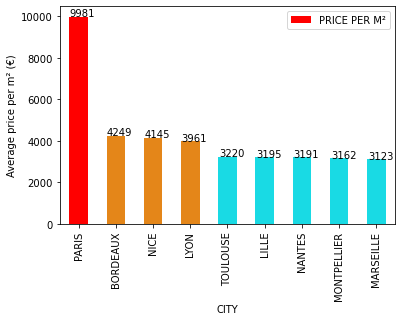

In [411]:
colors = tuple(np.where(df_1["PRICE PER M²"]>5000, 'r', 
         (np.where(df_1["PRICE PER M²"]>3500, '#E48619', '#19DAE4'))))


barplot = df_1.plot.bar(x='CITY', y='PRICE PER M²', color=colors)

barplot.set_ylabel("Average price per m² (€)")

for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))